In [3]:
%cd ../

/mnt/fugu/Public/JeremyV/code/hobby/connectome-harmonics


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [5]:
nets, ages = get_nets_and_ages()
harmonics, eigval = get_harmonics(nets)
harmonics_entropy = get_harmonics_entropy(harmonics)

/home/guppy/anaconda3.6/envs/connectome/lib/python3.10/site-packages/pygsp/graphs/graph.py:496: RuntimeWarning: divide by zero encountered in power
  d = np.power(self.dw, -0.5)


In [6]:
harmonics_entropy.shape

(594, 200)

In [7]:
harmonics.shape

(376, 376, 594)

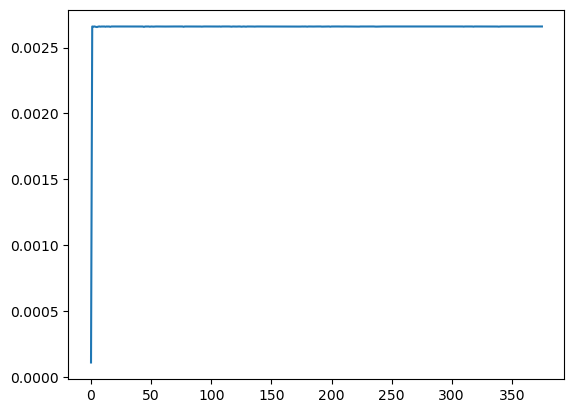

In [16]:
plt.plot(harmonics[:,:,0].var(axis=0))

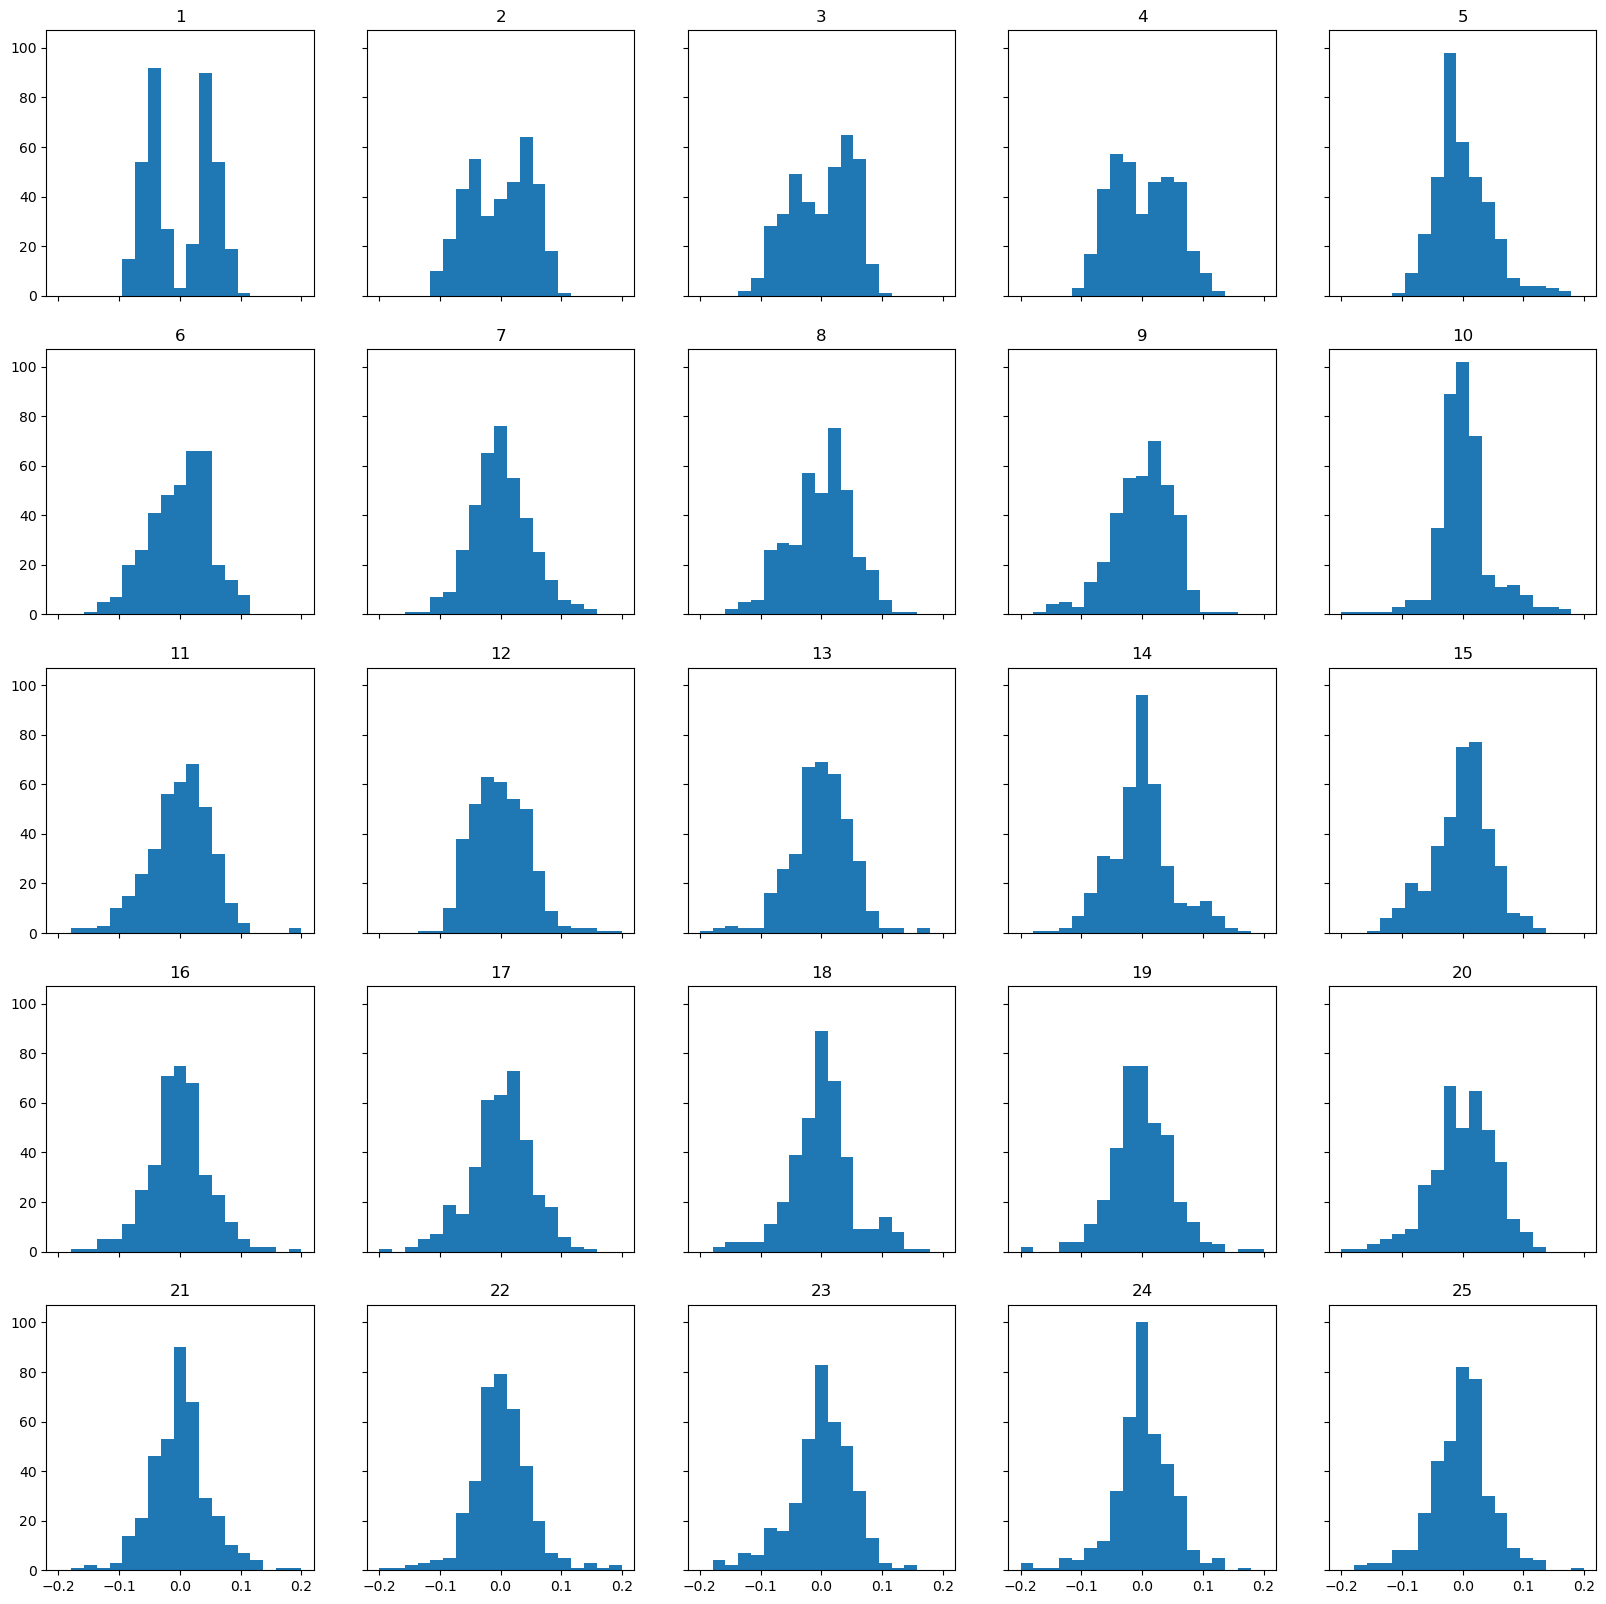

In [37]:
fig, axs = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(20,20))

bins = np.linspace(-0.2, .2, 20)
i = 1
for row in axs:
    for ax in row:
        ax.hist(harmonics[:,i,0], bins=bins)
        ax.set_title(i)
        i += 1

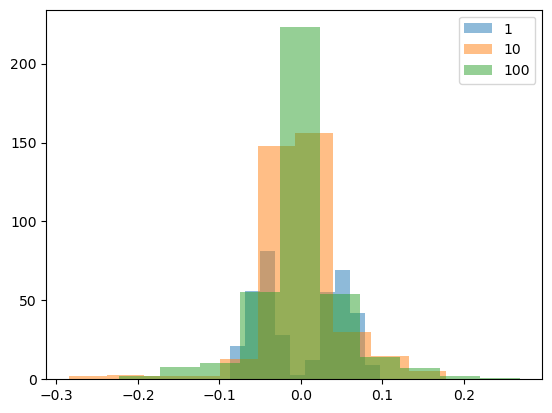

In [33]:
plt.hist(harmonics[:,1,0], label="1", alpha=0.5)
plt.hist(harmonics[:,10,0], label="10", alpha=0.5)
plt.hist(harmonics[:,100,0], label="100", alpha=0.5)

plt.legend()

In [ ]:
plt.hist(harmonics[:,0,0])

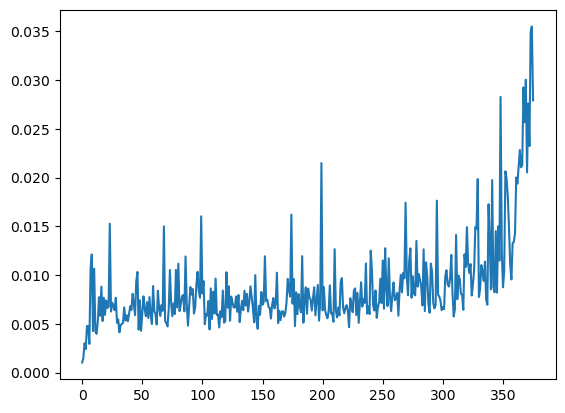

In [12]:
plt.plot((harmonics[:,:,590]**2).std(axis=0))

Text(0.5, 1.0, 'entropy of the harmonics by age (red=low-frequency)')

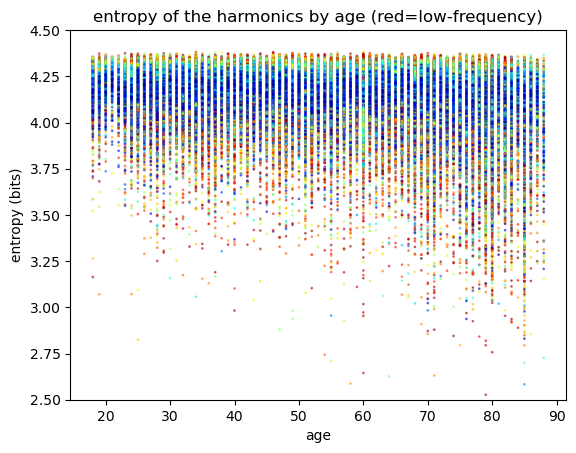

In [18]:
num_subjects, num_harmonics = harmonics_entropy.shape
# for each subject
# scatter plot that subject's harmonics
for subject_idx in range(num_subjects):
    entropies = harmonics_entropy[subject_idx]
    plt.scatter(ages[subject_idx].repeat(num_harmonics-1), entropies[1:], c=np.arange(num_harmonics, 1, -1), cmap='jet', s=1, alpha=0.5)
plt.xlabel('age')
plt.ylabel('entropy (bits)')
plt.ylim(2.5,4.5)
plt.title('entropy of the harmonics by age (red=low-frequency)')

Text(0.5, 1.0, 'entropy of the harmonics by age (red=low-frequency)')

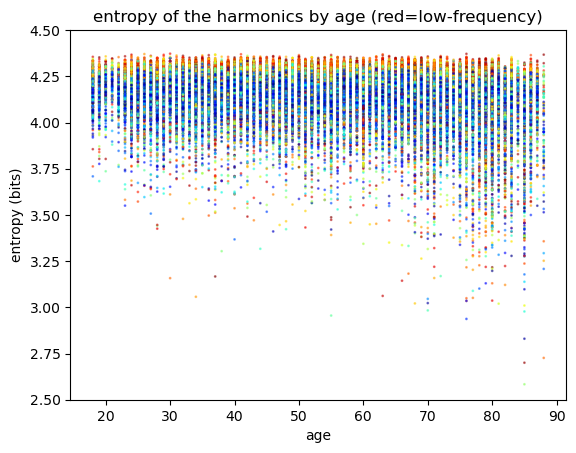

In [20]:
num_subjects, num_harmonics = harmonics_entropy.shape
# for each subject
# scatter plot that subject's harmonics
for subject_idx in range(num_subjects):
    entropies = harmonics_entropy[subject_idx]
    plt.scatter(ages[subject_idx].repeat(num_harmonics-100), entropies[100:], c=np.arange(num_harmonics, 100, -1), cmap='jet', s=1, alpha=0.5)
plt.xlabel('age')
plt.ylabel('entropy (bits)')
plt.ylim(2.5,4.5)
plt.title('entropy of the harmonics by age (red=low-frequency)')